# Analysis of the AI & Data Science Job Market

### Project Objective

The goal of this notebook is to perform a comprehensive analysis of a dataset containing job listings related to the fields of Artificial Intelligence and Data Science. By cleaning, exploring, and visualizing the data, we aim to uncover key insights into the current job market landscape.

Specifically, this analysis seeks to answer the following questions:
*   What are the most common job roles, and how are they distributed?
*   What is the typical distribution of company ratings for these roles?
*   Which companies are the most active recruiters in this space?
*   What are the most in-demand technical skills mentioned in job descriptions?

### 1. Importing Essential Libraries

This initial cell is dedicated to importing all the necessary Python libraries for our data analysis and visualization tasks.
*   **`numpy`**: For numerical operations.
*   **`pandas`**: The primary library for data manipulation and analysis, used here to work with our dataset in a DataFrame structure.
*   **`matplotlib.pyplot` & `seaborn`**: Powerful libraries for creating static, animated, and interactive visualizations.
*   **`re`**: The regular expression module, which will be crucial for text cleaning and pattern matching within the job descriptions.
*   **`collections.Counter`**: A specialized dictionary class for counting hashable objects, likely to be used for frequency analysis of words or skills.
*   **`wordcloud.WordCloud`**: A specific library for generating "word cloud" images from text data, a great way to visualize prominent terms in job descriptions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

### 2. Loading and Inspecting the Raw Data

Here, we load our dataset from a local CSV file into a pandas DataFrame and perform a preliminary inspection.
*   We define `CSV_PATH` to ensure the file path is read correctly on Windows.
*   `pd.read_csv()` is used to load the data into a DataFrame named `df_csv`.
*   `df_csv.shape` is printed to show the dimensions of the dataset (number of rows, number of columns).
*   `df_csv.head()` displays the first 5 rows, giving us an initial glimpse into the columns and the type of data they contain.

In [2]:
CSV_PATH = 'jobs_dataset.csv'
df_csv = pd.read_csv(CSV_PATH)

print(df_csv.shape)
df_csv.head()

(735, 14)


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


### 3. Data Cleaning: Removing Unnecessary Columns

A key step in data preprocessing is to remove columns that are irrelevant to our analysis.
*   A list named `COLUMNS_TO_DROP` is created to hold the names of the columns we wish to discard. This improves code readability.
*   We use the `.drop()` method to remove these columns. The result is stored in a new DataFrame called `df`, preserving the original `df_csv` for reference.
*   `errors='ignore'` is a safety measure; it prevents the code from failing if one of the specified columns doesn't exist in the DataFrame.

In [3]:
COLUMNS_TO_DROP = ['jobType/1', 'jobType/2', 'jobType/3', 'externalApplyLink', 'url', 'searchInput/country', 'searchInput/position']

df = df_csv.drop(columns=COLUMNS_TO_DROP, errors='ignore')

### 4. Data Cleaning: Renaming Columns for Clarity

To make the DataFrame easier to work with, we rename several columns to be more concise and consistent.
*   The `.rename()` method is used with a dictionary to map old column names to new ones.
*   Names like `positionName` and `jobType/0` are simplified to `position` and `job_type`, respectively. This follows common Python conventions (snake_case) and makes them easier to call later.
*   We call `df.head()` again at the end to verify that the renaming was successful.

In [4]:
df = df.rename(columns={
    'company': 'company',
    'rating': 'rating',
    'location': 'location',
    'positionName': 'position',
    'description': 'job_description',
    'salary': 'salary',
    'jobType/0': 'job_type'
})

In [5]:
df.head()

,company,rating,location,position,job_description,salary,job_type
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",Full-time
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",Full-time
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,Full-time
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",Full-time
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,Full-time


### 5. Feature Engineering: Categorizing Job Roles

To analyze the job market effectively, the raw job titles in the `position` column are too varied. This cell performs **feature engineering** to group them into standardized categories.

*   A function `map_role` is defined to classify each job title. It works by converting the title to lowercase and then searching for a set of predefined keywords.
*   If a keyword (e.g., 'data scientist', 'ml', 'analyst') is found, the function returns a standardized category (e.g., 'Data Scientist', 'Machine Learning', 'Analyst').
*   If no keywords match, it defaults to the 'Other' category.
*   Finally, the `.apply()` method is used to run this function on every entry in the `position` column, creating a new `role_category` column with the standardized roles.

In [6]:
def map_role(position):
    position = str(position).lower()
    keywords = [
        (['data scientist', 'applied scientist', 'data science'], 'Data Scientist'),
        (['machine learning', 'ml'], 'Machine Learning'),
        (['ai', 'artificial intelligence'], 'AI Engineer'),
        (['nlp', 'natural language'], 'NLP'),
        (['applied'], 'Applied Scientist'),
        (['researcher', 'research'], 'Researcher'),
        (['consultant'], 'Consultant'),
        (['statistician', 'statistic', 'statistical'], 'Statistician'),
        (['data engineer'], 'Data Engineer'),
        (['analyst', 'analytic'], 'Analyst'),
        (['intern'], 'Intern')
    ]
    for words, category in keywords:
        if any(word in position for word in words):
            return category
    return 'Other'

df['role_category'] = df['position'].apply(map_role)

In [7]:
df.head()

,company,rating,location,position,job_description,salary,job_type,role_category
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",Full-time,Data Scientist
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",Full-time,Data Scientist
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,Full-time,Data Scientist
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",Full-time,Machine Learning
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,Full-time,Machine Learning


### 6. Visualization: Distribution of Job Roles

Now that we have our standardized job roles, we can visualize their distribution to see which roles are most common in the dataset.

*   `df['role_category'].value_counts()`: This counts the occurrences of each unique category in our new column and sorts them in descending order.
*   A horizontal bar plot is created using `seaborn.barplot`. This type of plot is ideal for comparing categories, especially when category names are long.
    *   The **x-axis** represents the total number of job listings for each role.
    *   The **y-axis** lists the different role categories.

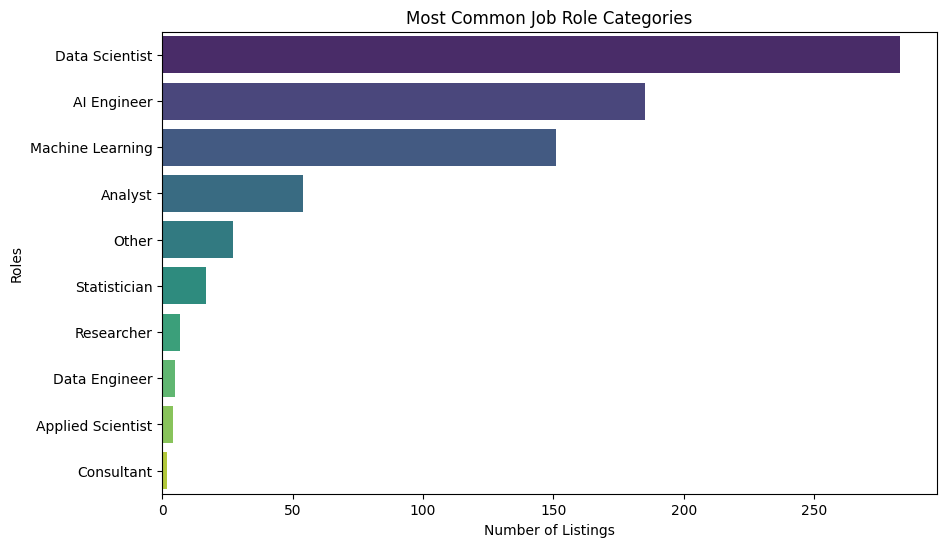

In [8]:
top_roles = df['role_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_roles.values, y=top_roles.index, hue=top_roles.index, palette="viridis", legend=False)
plt.title('Most Common Job Role Categories')
plt.xlabel('Number of Listings')
plt.ylabel('Roles')
plt.show()

### 7. Statistical Analysis: Company Ratings Summary

Here, we switch focus to the `rating` column to understand its statistical properties.

*   The `.describe()` method is called on the `rating` column from the original `df_csv` DataFrame.
*   This provides a quick and powerful statistical summary, including:
    *   `count`: The number of non-null ratings.
    *   `mean`: The average rating.
    *   `std`: The standard deviation, measuring the dispersion of ratings.
    *   `min`, `25%`, `50%` (median), `75%`, `max`: The five-number summary, which gives us an idea of the data's range and distribution.

In [9]:
print(df_csv['rating'].describe())

count    735.000000
mean       3.232109
std        1.357551
min        0.000000
25%        3.300000
50%        3.700000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


### 8. Visualization: Histogram of Company Ratings

To better visualize the distribution shown by the `.describe()` output, we create a histogram.

*   A `seaborn.histplot` is generated for the `rating` column.
*   `bins=20` divides the range of ratings into 20 distinct intervals, and the height of each bar shows the frequency (number of jobs) within that interval.
*   `kde=True` overlays a **Kernel Density Estimate** curve, which is a smooth line that helps visualize the underlying probability distribution of the ratings. This plot helps us see if ratings are clustered around a certain value, skewed, or uniformly distributed.

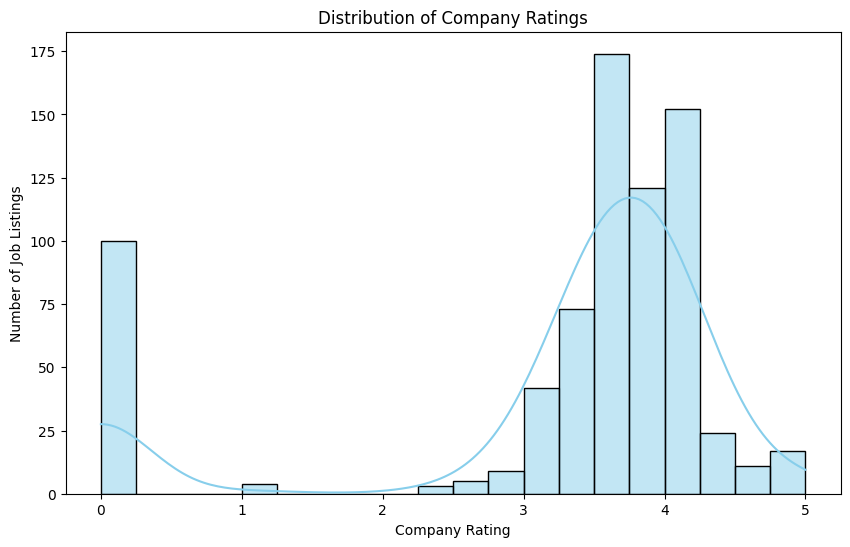

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df_csv['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Ratings')
plt.xlabel('Company Rating')
plt.ylabel('Number of Job Listings')
plt.show()

### 9. Visualization: Boxplot of Company Ratings

A boxplot provides another view of the distribution, making it particularly easy to spot the median, quartiles, and potential outliers.

*   The central box represents the **Interquartile Range (IQR)**, spanning from the 25th percentile (Q1) to the 75th percentile (Q3).
*   The vertical line inside the box marks the **median** (50th percentile).
*   The "whiskers" extend to show the range of the data, typically 1.5 times the IQR from the box.
*   Any points that fall outside the whiskers are plotted individually and can be considered potential **outliers**.

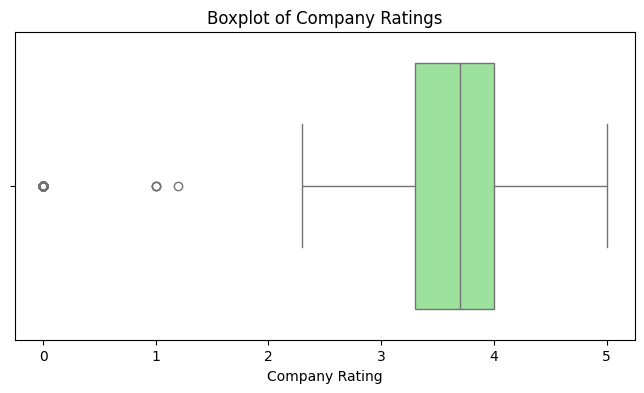

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_csv['rating'], color='lightgreen')
plt.title('Boxplot of Company Ratings')
plt.xlabel('Company Rating')
plt.show()

### 10. Analysis: Average Company Rating by Job Type

This cell explores if there's a correlation between different `job_type` categories (e.g., Full-time, Part-time, Internship) and the average company rating.

*   `df.groupby('job_type')['rating'].mean()`: We group the DataFrame by `job_type` and then calculate the mean `rating` for each group.
*   `.sort_values(ascending=False)`: Sorts the results to show the job types with the highest average ratings first.
*   A horizontal bar plot is generated using `seaborn.barplot` to visualize these average ratings, allowing for easy comparison across different job types. This helps identify if certain job types are typically offered by higher-rated companies.

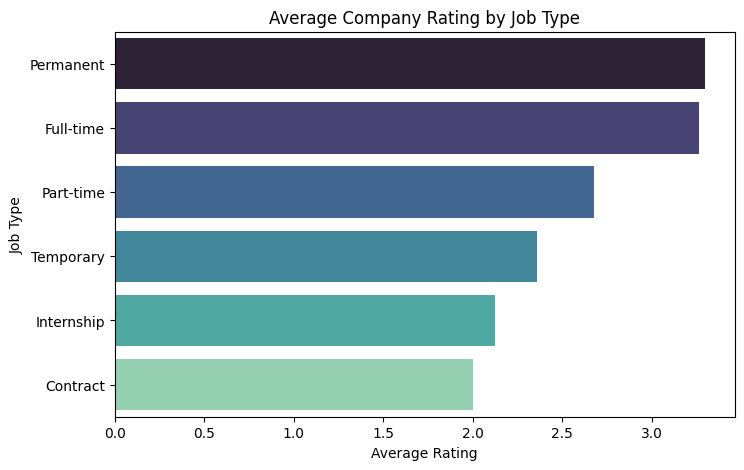

In [12]:
rating_by_job_type = df.groupby('job_type')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=rating_by_job_type.values, y=rating_by_job_type.index,hue=rating_by_job_type.index, palette="mako", legend=False)
plt.title('Average Company Rating by Job Type')
plt.xlabel('Average Rating')
plt.ylabel('Job Type')
plt.show()

### 11. Analysis: Top Companies for AI/Data Roles

This cell focuses on identifying the companies that are most actively hiring for roles related to AI and Data, leveraging the `role_category` feature we engineered.

*   `df[df['role_category'] != 'Other']`: First, we filter the DataFrame to exclude jobs classified as 'Other', focusing only on the specific AI/Data related roles.
*   `['company'].value_counts().head(10)`: From this filtered data, we count the occurrences of each company and then select the top 10 companies with the most job listings.
*   A horizontal bar plot visualizes these top companies, showing how many relevant job listings each has, providing insight into the key players in the AI/Data job market.

In [13]:
ai_data_roles = df[df['role_category'] != 'Other']
jobs_per_company = ai_data_roles['company'].value_counts().head(10)

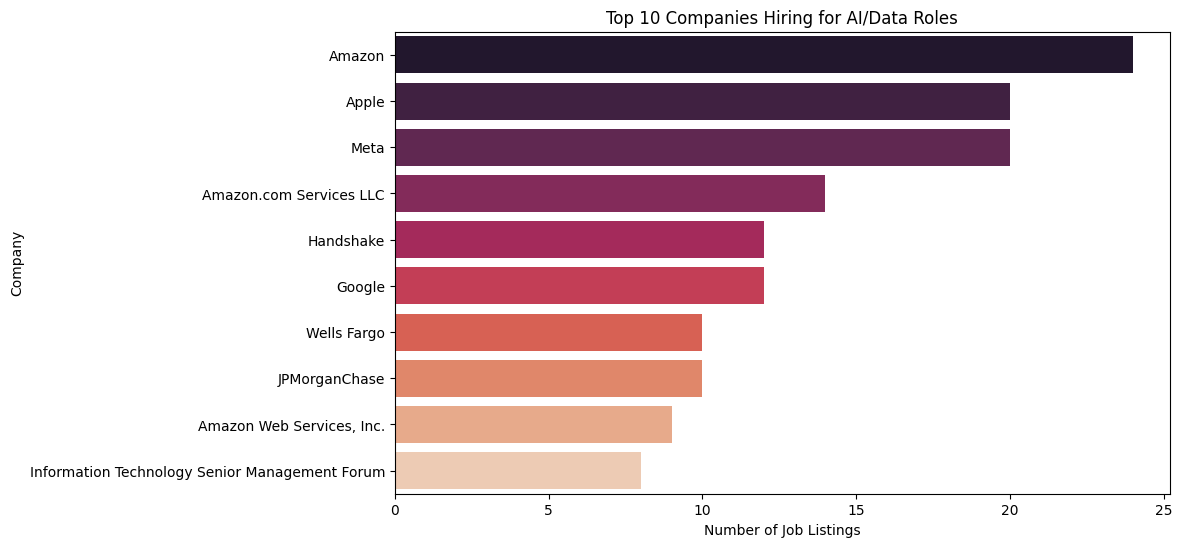

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=jobs_per_company.values, y=jobs_per_company.index, hue=jobs_per_company.index, palette="rocket", legend=False)
plt.title('Top 10 Companies Hiring for AI/Data Roles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.show()

### 12. Defining a Comprehensive List of Skills

Before extracting skills from job descriptions, we define a comprehensive list of keywords that represent common technical skills in the AI/Data domain. This structured list is crucial for a consistent and accurate extraction process.

*   The `skills_list` is a Python list containing numerous keywords, categorized by type (e.g., Programming languages, Machine learning, Cloud platforms, Databases).
*   This list will serve as a lookup dictionary to identify relevant skills mentioned in the unstructured text of job descriptions. The breadth of this list aims to capture a wide range of in-demand proficiencies.

In [15]:
skills_list = [
    # Programming languages
    'python', 'r', 'java', 'c++', 'c', 'scala', 'matlab', 'javascript', 'typescript', 'bash', 'shell',

    # Data manipulation & libraries
    'pandas', 'numpy', 'scipy', 'scikit-learn', 'statsmodels', 'mlr', 'tidyverse', 'dplyr', 'ggplot2',

    # Machine learning & deep learning
    'machine learning', 'deep learning', 'nlp', 'cv', 'computer vision', 'reinforcement learning',
    'keras', 'tensorflow', 'pytorch', 'mxnet', 'theano', 'lightgbm', 'xgboost', 'catboost', 'prophet',

    # Data engineering & big data
    'spark', 'hadoop', 'hive', 'pig', 'flink', 'beam', 'kafka', 'airflow', 'dbt',

    # Databases
    'sql', 'mysql', 'postgresql', 'sqlite', 'oracle', 'mongodb', 'cassandra', 'redis', 'dynamodb',

    # Cloud platforms
    'aws', 'azure', 'gcp', 'bigquery', 'redshift', 's3', 'emr', 'databricks', 'snowflake',

    # Devops & deployment
    'docker', 'kubernetes', 'terraform', 'ansible', 'jenkins', 'git', 'ci/cd',

    # Visualization & BI
    'tableau', 'powerbi', 'looker', 'superset', 'matplotlib', 'seaborn', 'plotly', 'dash',

    # Math & statistics
    'statistics', 'bayesian', 'markov', 'linear regression', 'logistic regression',
    'classification', 'clustering', 'k-means', 'pca', 'svm', 'random forest', 'decision trees',

    # Other ML tools / packages
    'fastai', 'huggingface', 'transformers', 'spacy', 'nltk', 'gensim',

    # General technologies
    'excel', 'sheets', 'jira', 'notebook', 'jupyter', 'colab',

    # MLOps & monitoring
    'mlflow', 'wandb', 'dvc', 'sagemaker', 'vertex ai'
]

### 13. Skill Extraction and Frequency Counting

This cell implements the core logic for identifying and counting skills within the job descriptions.

*   **`extract_skills(text, skills_list)` function**:
    *   Takes a job description text and our predefined `skills_list`.
    *   Converts the text to lowercase for case-insensitive matching.
    *   Iterates through the `skills_list` and checks if each skill keyword is present in the job description.
    *   Returns a list of all skills found in that specific job description.
*   **Applying the function**:
    *   `df['job_description'].dropna()`: Ensures we only process non-empty descriptions.
    *   `.apply(lambda x: extract_skills(x, skills_list))`: Applies our `extract_skills` function to each job description, creating a new column `extracted_skills` which contains a list of skills for each job.
*   **Counting all skills**:
    *   `all_skills = [skill for sublist in df['extracted_skills'] for skill in sublist]`: This flattens the list of lists in `extracted_skills` into a single, comprehensive list of all skills mentioned across all job descriptions.
    *   `skill_counts = Counter(all_skills)`: The `collections.Counter` object is used to efficiently count the frequency of each unique skill in `all_skills`.
*   **Preparing for Word Cloud**:
    *   A `WordCloud` object is initialized with specific dimensions and a white background.
    *   `.generate_from_frequencies(skill_counts)`: This method generates the word cloud layout directly from our `skill_counts` dictionary, where the size of each word will correspond to its frequency.

In [16]:
def extract_skills(text, skills_list):
    text = text.lower()
    found_skills = [skill for skill in skills_list if skill in text]
    return found_skills

df['extracted_skills'] = df['job_description'].dropna().apply(lambda x: extract_skills(x, skills_list))
all_skills = [skill for sublist in df['extracted_skills'] for skill in sublist]
skill_counts = Counter(all_skills)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

### 14. Visualization: Word Cloud of Most Frequent Skills

Finally, this cell visualizes the most frequently mentioned skills in job descriptions using a word cloud, offering an intuitive and visually engaging summary of in-demand proficiencies.

*   `plt.figure(figsize=(12,6))`: Sets the size of the plot for better readability.
*   `plt.imshow(wordcloud, interpolation='bilinear')`: Displays the generated word cloud image. `interpolation='bilinear'` smooths the image.
*   `plt.axis('off')`: Removes the x and y axes, as they are not relevant for a word cloud.
*   The title clearly states the purpose of the visualization.
*   `plt.show()`: Renders the word cloud, where larger words indicate higher frequency in the job descriptions. This provides a quick overview of the most sought-after skills.

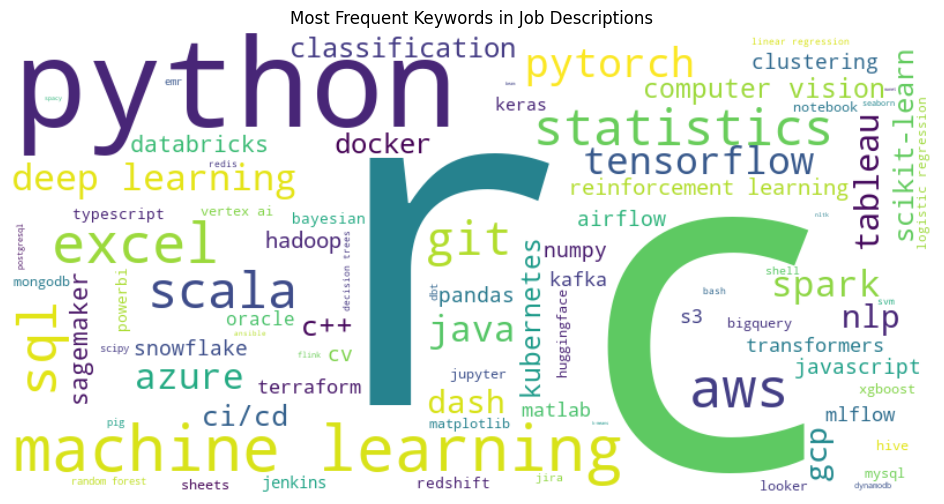

In [17]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Keywords in Job Descriptions')
plt.show()